## Model spremnika topline

$G(s)=\frac{1}{k_g + Cs}$

In [1]:
# priprema okruženja
%matplotlib nbagg
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from control import tf, step_response, forced_response

In [4]:
# Prijenosna funkcija spremnika

def tf_spremnik(C, k_g):
    return tf([1],[C, k_g])

In [19]:
# definicija prijenosne funkcije, s parametrima C i k_g

G1 = tf_spremnik(C=10, k_g=3)

G1


    1
--------
10 s + 3

<IPython.core.display.Javascript object>


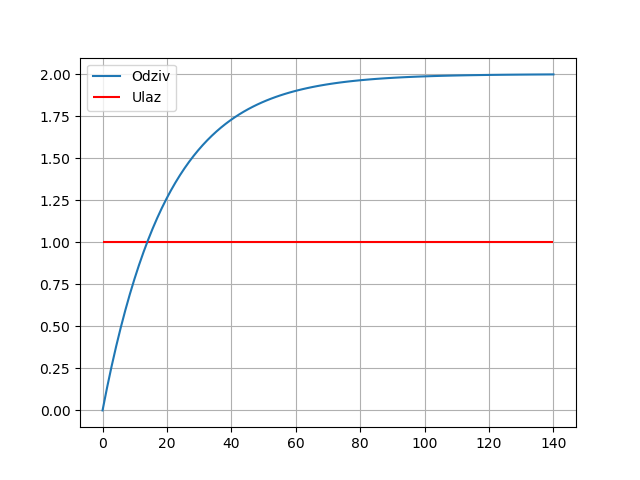

In [18]:
# odziv na jediničnu skokovitu pobudu
t, y = step_response(G1)
plt.figure()
plt.plot(t,y)
plt.hlines(1, min(t), max(t), colors='r')
plt.legend(['Odziv', 'Ulaz'])
plt.grid()

<IPython.core.display.Javascript object>


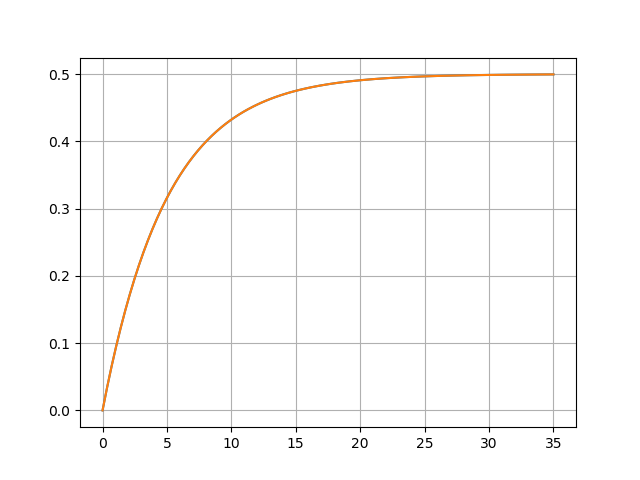

In [8]:
# usporedba sa izračunatom vrijednosti
# y = 1/k_g * ( 1-e^(-k_g/C t) )
t2 = np.linspace(0, 35, 200)
y2=1/2*(1-np.exp(-2/10*t2))

plt.figure()
plt.plot(t,y, t2, y2)
plt.grid()

<IPython.core.display.Javascript object>


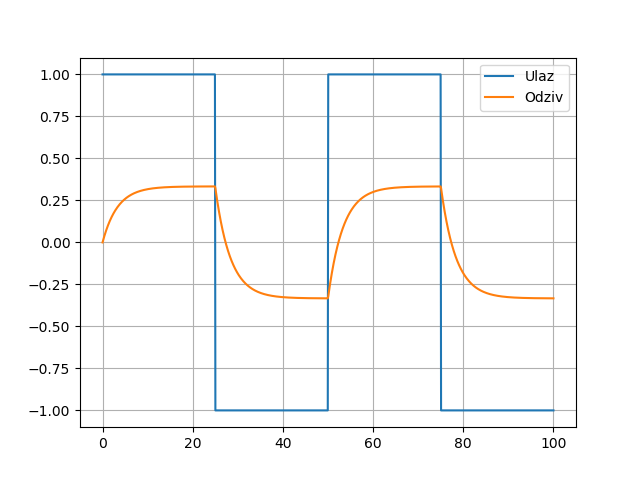

In [20]:
# odziv na niz skokovitih pobuda

t_u = np.linspace(0, 100, 1000)
u = signal.square(2 * np.pi * 20 * t_u, 0.5)

t2, y2, x2 = forced_response(G1, t_u, u)


plt.figure()
plt.plot(t_u, u, t2, y2)
plt.legend(['Ulaz', 'Odziv'])
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


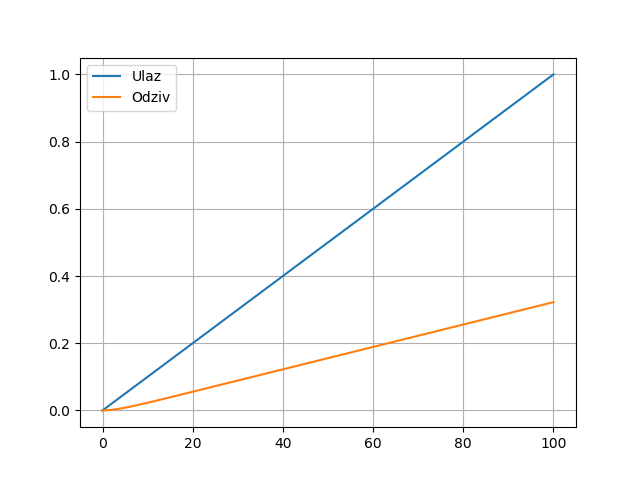

In [21]:
# odziv na rastuci ulaz

t_u = np.linspace(0, 100, 1000)
u = t_u/100

t2, y2, x2 = forced_response(G1, t_u, u)


plt.figure()
plt.plot(t_u, u, t2, y2)
plt.legend(['Ulaz', 'Odziv'])
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


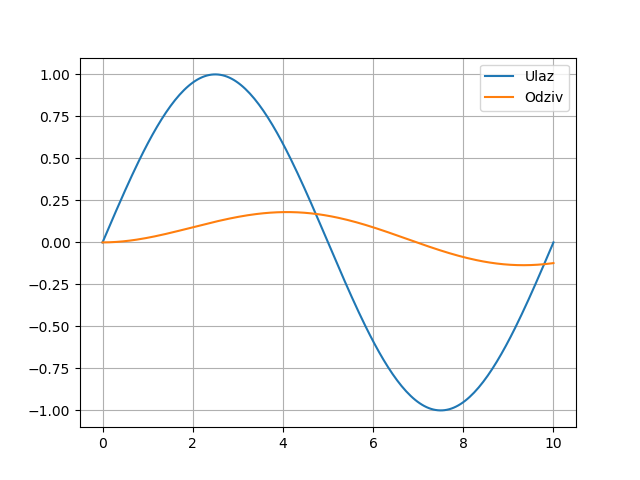

In [25]:
# odziv na sinusnu funkciju
A=1
T=10
fi=0

t_u = np.linspace(0.0, 10.0, 200)
u = A*np.sin(2*np.pi*t_u/T + fi)

t2, y2, x2 = forced_response(G1, t_u, u)


plt.figure()
plt.plot(t_u, u, t2, y2)
plt.legend(['Ulaz', 'Odziv'])
plt.grid()
plt.show()